<a href="https://colab.research.google.com/github/Ireneyou33/Model-Comparison-and-Forecasting-on-COVID-19/blob/master/SIRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout
import datetime as dt
from tensorflow.python.keras.layers import Dense, LSTM
from tensorflow.python.keras import Sequential
from keras.models import load_model
from keras.models import model_from_json
from datetime import datetime, timedelta

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_conf=pd.read_csv("/content/drive/My Drive/ST494/project/Conf_new.csv")
df_death=pd.read_csv("/content/drive/My Drive/ST494/project/Death_new.csv")
df_recover=pd.read_csv("/content/drive/My Drive/ST494/project/Rec_new.csv")

In [ ]:
date=df_conf.columns[4:]
i = 0
date.values[i]=pd.to_datetime(date.values[i], format="%m/%d/%y")
start_date = date.values[i]
for i in range(1,len(date)):
    date.values[i]=init_date + timedelta(days=i)

print(len(date))

idx = int(len(date)*0.8)
print(idx)

169
135


## Hubei Province, China

Hubei lockdown on Jan. 23, 2020 (Day 1)

In [ ]:
ave_days = 7
lockdown_date=1

### Hubei R0

Hubei cumulative Confirmed, Recovery, Deaths cases

In [ ]:
df_hubei=df_conf[df_conf["Province/State"]=="Hubei"].iloc[:,4:]
hubei_recov=df_recover[df_recover["Province/State"]=="Hubei"].iloc[:,4:]
hubei_death=df_death[df_death["Province/State"]=="Hubei"].iloc[:,4:]

In [ ]:
hubei_death.shape[1]

169

Log of Confirmed/Infectious population in Hubei province

In [ ]:
df_hubei_aveR0=ave_R0(df_hubei, hubei_recov, hubei_death, ave_days=7)
df_hubei_aveR0

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01
0,9.212515,13.544321,13.471056,14.368105,14.740208,15.043069,14.843987,17.012653,14.125969,13.860258,12.183254,10.956206,9.54033,7.970804,5.802139,6.227796,5.790262,5.325837,4.795809,4.442858,4.166967,4.204717,2.514164,2.281598,2.075019,1.831735,1.657195,1.517584,1.507692,1.494194,1.171652,1.139022,1.170485,1.163312,1.139373,1.118397,1.103782,1.10121,1.085418,1.057278,...,0.428571,0.428571,0.428571,0.285714,0.285714,0.428571,0.285714,0.285714,0.142857,0.142857,0.142857,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


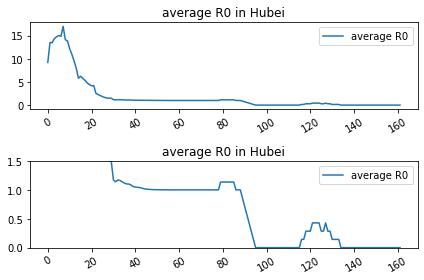

In [ ]:
plt.subplot(211)
# plt.figure(figsize=(10,7))
plt.plot(df_hubei_aveR0.loc[0].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0"])
plt.title("average R0 in Hubei")

plt.subplot(212)
plt.plot(df_hubei_aveR0.loc[0].tolist())
plt.xticks(rotation=30)
plt.ylim(0,1.5)
plt.legend('best', labels=["average R0"])
plt.title("average R0 in Hubei")
plt.tight_layout()
plt.show()

### LSTM R0

Train and save models

In [ ]:
# lstm_r0_model(df_hubei_aveR0, w=3, r=1, lockdown_date=1)

In [ ]:
lstm_r0_model(df_hubei_aveR0, w=1, r=1, lockdown_date=1)

In [ ]:
# w=3
# r=1
# NN_r0_model(df_hubei_aveR0, w=w, r=1, lockdown_date=1)

In [ ]:
# w=1
# NN_r0_model(df_hubei_aveR0, w=w, r=1, lockdown_date=1)

In [ ]:
w=5
NN_r0_model(df_hubei_aveR0, w=w, r=1, lockdown_date=1)

## Italy R0

Italy lockdown on Mar.9, 2020 (Day47)

In [ ]:
ave_days = 7
lockdown_date=47

In [ ]:
df_italy=df_conf[df_conf["Country/Region"]=="Italy"].iloc[:,4:]
italy_recov=df_recover[df_recover["Country/Region"]=="Italy"].iloc[:,4:]
italy_death=df_death[df_death["Country/Region"]=="Italy"].iloc[:,4:]

In [ ]:
df_italy_aveR0 = ave_R0(df_italy, italy_recov, italy_death, ave_days=7)
df_italy_aveR0.iloc[:,lockdown_date:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':


,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01
0,6.565064,6.659069,6.445157,5.470095,6.221069,5.933389,5.762067,6.287747,5.756697,5.812294,5.468051,4.735143,4.728785,4.774478,3.915894,3.855252,3.799949,3.600616,3.346389,3.341853,3.275714,3.345552,3.252607,3.09508,3.025509,2.957459,2.851417,2.674073,2.617356,2.601678,2.642456,2.619825,2.559295,2.498713,2.393575,2.285159,2.220828,2.11658,2.018005,1.988728,...,1.200642,1.180172,1.184756,1.189521,1.206947,1.207455,1.213315,1.221,1.231253,1.249032,1.24257,1.213744,1.226815,1.202223,1.200648,1.197153,1.212445,1.21292,1.239946,1.243599,1.215689,1.252456,1.290239,1.282472,1.276838,1.283734,1.308038,1.362613,1.324842,1.331435,1.33254,1.337693,1.335665,1.34293,1.38316,1.424961,1.509772,1.662558,1.676087,1.655856


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


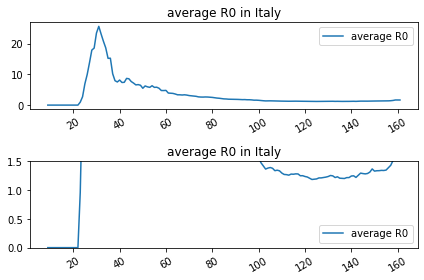

In [ ]:
plt.subplot(211)
# plt.figure(figsize=(10,7))
plt.plot(df_italy_aveR0.loc[0].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0"])
plt.title("average R0 in Italy")

plt.subplot(212)
plt.plot(df_italy_aveR0.loc[0].tolist())
plt.xticks(rotation=30)
plt.ylim(0,1.5)
plt.legend('best', labels=["average R0"])
plt.title("average R0 in Italy")
plt.tight_layout()
plt.show()

### LSTM R0

In [ ]:
model_LSTM_w1 = tf.keras.models.load_model('HubeiR0_LSTM_w1.h5')

In [ ]:
w=1
r=1
x_test, y_test = get_traintestdata(df_italy_aveR0, w=w, r=1, lockdown_date=lockdown_date)

In [ ]:
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], r))
y_pred = model_LSTM_w1.predict(x_test, verbose=0)

In [ ]:
lstm_residuals = y_pred - y_test
lstm_rmse = np.sqrt(np.sum(np.power(lstm_residuals,2)) / len(lstm_residuals))
print('RMSE = %.2f' % lstm_rmse)

RMSE = 0.38


In [ ]:
df_LSTM_w1 = df_italy_aveR0.iloc[:,lockdown_date:]
df_LSTM_w1 = df_LSTM_w1.append(pd.Series(), ignore_index=True)
df_LSTM_w1.iloc[1,w:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
df_LSTM_w1

,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01
0,6.565064,6.659069,6.445157,5.470095,6.221069,5.933389,5.762067,6.287747,5.756697,5.812294,5.468051,4.735143,4.728785,4.774478,3.915894,3.855252,3.799949,3.600616,3.346389,3.341853,3.275714,3.345552,3.252607,3.095080,3.025509,2.957459,2.851417,2.674073,2.617356,2.601678,2.642456,2.619825,2.559295,2.498713,2.393575,2.285159,2.220828,2.116580,2.018005,1.988728,...,1.200642,1.180172,1.184756,1.189521,1.206947,1.207455,1.213315,1.221000,1.231253,1.249032,1.242570,1.213744,1.226815,1.202223,1.200648,1.197153,1.212445,1.212920,1.239946,1.243599,1.215689,1.252456,1.290239,1.282472,1.276838,1.283734,1.308038,1.362613,1.324842,1.331435,1.332540,1.337693,1.335665,1.342930,1.383160,1.424961,1.509772,1.662558,1.676087,1.655856
1,NaN,6.035208,6.145552,5.895910,4.822264,5.639903,5.319413,5.132864,5.715493,5.127069,5.187224,4.820122,4.063469,4.057076,4.103126,3.233221,3.173513,3.117897,2.921593,2.680956,2.676761,2.615968,2.680182,2.594899,2.453592,2.392467,2.333431,2.242911,2.095502,2.049397,2.036742,2.069739,2.051394,2.002718,1.954527,1.872031,1.788724,1.740131,1.662698,1.590962,...,1.063301,1.049866,1.037508,1.040271,1.043145,1.053684,1.053992,1.057546,1.062213,1.068452,1.079306,1.075356,1.057806,1.065750,1.050823,1.049869,1.047756,1.057018,1.057306,1.073754,1.075984,1.058986,1.081400,1.104626,1.099836,1.096366,1.100613,1.115635,1.149660,1.126068,1.130172,1.130861,1.134073,1.132808,1.137341,1.162577,1.189034,1.243459,1.344047,1.353113


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


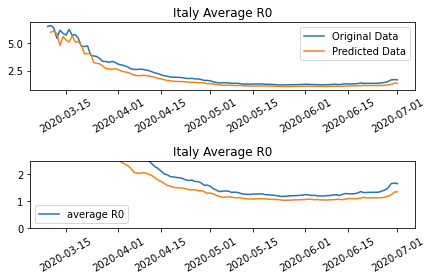

In [ ]:
# w = 1
plt.subplot(2,1,1)
plt.plot(df_LSTM_w1.iloc[0],label="Original Data")
plt.plot(df_LSTM_w1.iloc[1],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel='R0'
plt.xlabel='Date'
plt.xticks(rotation=30)
plt.title('Italy Average R0')

plt.subplot(2,1,2)
plt.plot(df_LSTM_w1.iloc[0],label="Original Data")
plt.plot(df_LSTM_w1.iloc[1],label="Predicted Data")
plt.xticks(rotation=30)
plt.ylim(0,2.5)
plt.legend('best', labels=["average R0"])
plt.title("Italy Average R0")
plt.tight_layout()
plt.show()

In [ ]:
model_NN_w1 = tf.keras.models.load_model('HubeiR0_NN_w1.h5')

In [ ]:
w=1
x_test, y_test = get_traintestdata(df_italy_aveR0, w=1, r=1, lockdown_date=lockdown_date)

In [ ]:
x_test = np.array(x_test)
y_pred = model_NN_w1.predict(x_test, verbose=0)

nn_residuals = y_pred - y_test
nn_rmse = np.sqrt(np.sum(np.power(nn_residuals,2)) / len(nn_residuals))
print('RMSE = %.2f' % nn_rmse)

RMSE = 0.16


In [ ]:
df_NN_w1 = df_italy_aveR0.iloc[:,lockdown_date+w-1:]
df_NN_w1 = df_NN_w1.append(pd.Series(), ignore_index=True)
df_NN_w1.iloc[1,w:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


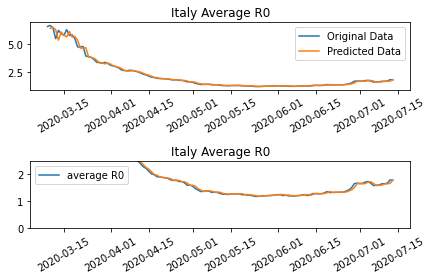

In [ ]:
# w = 1
plt.subplot(2,1,1)
plt.plot(df_NN_w1.iloc[0],label="Original Data")
plt.plot(df_NN_w1.iloc[1],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel='R0'
plt.xlabel='Date'
plt.xticks(rotation=30)
plt.title('Italy Average R0')

plt.subplot(2,1,2)
plt.plot(df_NN_w1.iloc[0],label="Original Data")
plt.plot(df_NN_w1.iloc[1],label="Predicted Data")
plt.xticks(rotation=30)
plt.ylim(0,2.5)
plt.legend('best', labels=["average R0"])
plt.title("Italy Average R0")
plt.tight_layout()
plt.show()

In [ ]:
model_NN_w3 = tf.keras.models.load_model('HubeiR0_NN_w3.h5')

In [ ]:
w=3
x_test, y_test = get_traintestdata(df_italy_aveR0, w=w, r=1, lockdown_date=lockdown_date)

In [ ]:
x_test = np.array(x_test)
y_pred = model_NN_w3.predict(x_test, verbose=0)

nn_residuals = y_pred - y_test
nn_rmse = np.sqrt(np.sum(np.power(nn_residuals,2)) / len(nn_residuals))
print('RMSE = %.2f' % nn_rmse)

RMSE = 0.19


In [ ]:
df_NN_w3 = df_italy_aveR0.iloc[:,lockdown_date+w-1:]
df_NN_w3 = df_NN_w3.append(pd.Series(), ignore_index=True)
df_NN_w3.iloc[1, 1:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


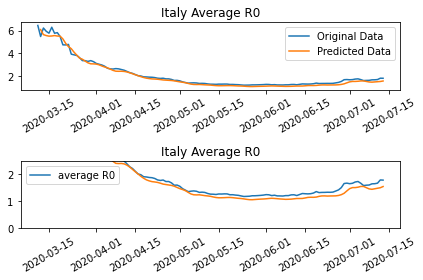

In [ ]:
# w = 1
plt.subplot(2,1,1)
plt.plot(df_NN_w3.iloc[0],label="Original Data")
plt.plot(df_NN_w3.iloc[1],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel='R0'
plt.xlabel='Date'
plt.xticks(rotation=30)
plt.title('Italy Average R0')

plt.subplot(2,1,2)
plt.plot(df_NN_w3.iloc[0],label="Original Data")
plt.plot(df_NN_w3.iloc[1],label="Predicted Data")
plt.xticks(rotation=30)
plt.ylim(0,2.5)
plt.legend('best', labels=["average R0"])
plt.title("Italy Average R0")
plt.tight_layout()
plt.show()

In [ ]:
model_NN_w5 = tf.keras.models.load_model('HubeiR0_NN_w5.h5')

In [ ]:
w=5
x_test, y_test = get_traintestdata(df_italy_aveR0, w=w, r=1, lockdown_date=lockdown_date)

In [ ]:
x_test = np.array(x_test)
y_pred = model_NN_w5.predict(x_test, verbose=0)

nn_residuals = y_pred - y_test
nn_rmse = np.sqrt(np.sum(np.power(nn_residuals,2)) / len(nn_residuals))
print('RMSE = %.2f' % nn_rmse)

RMSE = 0.15


In [ ]:
df_NN_w5 = df_italy_aveR0.iloc[:,lockdown_date+w-1:]
df_NN_w5 = df_NN_w5.append(pd.Series(), ignore_index=True)
df_NN_w5.iloc[1, 1:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


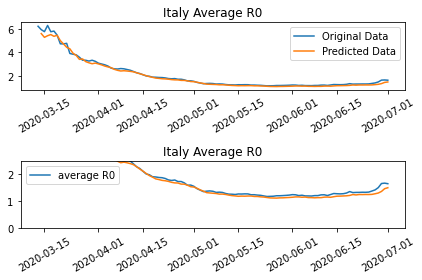

In [ ]:
# w = 5
plt.subplot(2,1,1)
plt.plot(df_NN_w5.iloc[0],label="Original Data")
plt.plot(df_NN_w5.iloc[1],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel='R0'
plt.xlabel='Date'
plt.xticks(rotation=30)
plt.title('Italy Average R0')

plt.subplot(2,1,2)
plt.plot(df_NN_w5.iloc[0],label="Original Data")
plt.plot(df_NN_w5.iloc[1],label="Predicted Data")
plt.xticks(rotation=30)
plt.ylim(0,2.5)
plt.legend('best', labels=["average R0"])
plt.title("Italy Average R0")
plt.tight_layout()
plt.show()

### Forecasting

In [ ]:
# forecast_days=30
# w=3
# df_ItalyR0_forecast_w3 = R0_forecast(df_LSTM_w3, model_LSTM_w3, forecast_days=30, w=3, r=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


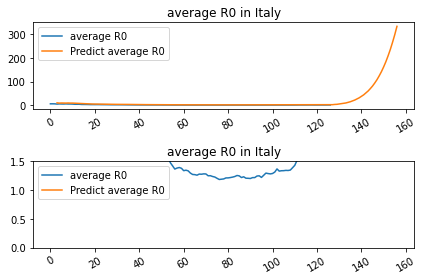

In [ ]:
# plt.subplot(2,1,1)
# plt.plot(df_ItalyR0_forecast_w3.iloc[0, :-forecast_days].tolist())
# plt.plot(df_ItalyR0_forecast_w3.loc[1].tolist())
# plt.xticks(rotation=30)
# plt.legend('best', labels=["average R0", "Predict average R0"])
# plt.title("average R0 in Italy")

# plt.subplot(2,1,2)
# plt.plot(df_ItalyR0_forecast_w3.iloc[0,:-forecast_days].tolist())
# plt.plot(df_ItalyR0_forecast_w3.loc[1].tolist())
# plt.xticks(rotation=30)
# plt.ylim(0,1.5)
# plt.legend('best', labels=["average R0", "Predict average R0"])
# plt.title("average R0 in Italy")
# plt.tight_layout()
# plt.show()

In [ ]:
forecast_days=30
w=1
df_ItalyR0_forecast_w1 = R0_forecast(df_LSTM_w1, model_LSTM_w1, forecast_days=30, w=1, r=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


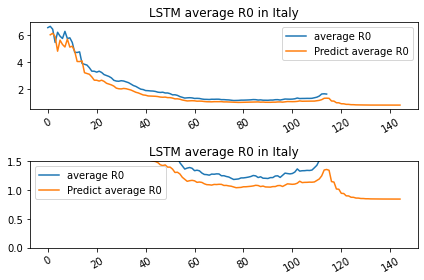

In [ ]:
plt.subplot(2,1,1)
plt.plot(df_ItalyR0_forecast_w1.iloc[0, :-forecast_days].tolist())
plt.plot(df_ItalyR0_forecast_w1.loc[1].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("LSTM average R0 in Italy")

plt.subplot(2,1,2)
plt.plot(df_ItalyR0_forecast_w1.iloc[0,:-forecast_days].tolist())
plt.plot(df_ItalyR0_forecast_w1.loc[1].tolist())
plt.xticks(rotation=30)
plt.ylim(0,1.5)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("LSTM average R0 in Italy")
plt.tight_layout()
plt.show()

In [ ]:
forecast_days=30
w=1
df_ItalyR0_forecast_w1 = R0_forecast(df_NN_w1, model_NN_w1, forecast_days=30, w=w, r=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


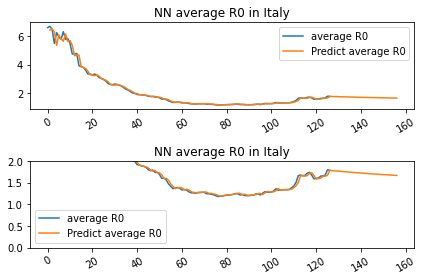

In [ ]:
plt.subplot(2,1,1)
plt.plot(df_ItalyR0_forecast_w1.iloc[0, :-forecast_days].tolist())
plt.plot(df_ItalyR0_forecast_w1.loc[1].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("NN average R0 in Italy")

plt.subplot(2,1,2)
plt.plot(df_ItalyR0_forecast_w1.iloc[0,:-forecast_days].tolist())
plt.plot(df_ItalyR0_forecast_w1.loc[1].tolist())
plt.xticks(rotation=30)
plt.ylim(0,2)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("NN average R0 in Italy")
plt.tight_layout()
plt.show()

In [ ]:
forecast_days=30
w=5
df_ItalyR0_forecast_w5 = R0_forecast(df_NN_w5, model_NN_w5, forecast_days=30, w=w, r=1, LSTM=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


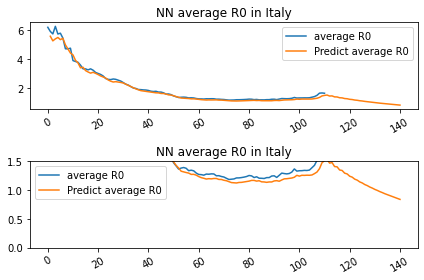

In [ ]:
plt.subplot(2,1,1)
plt.plot(df_ItalyR0_forecast_w5.iloc[0, :-forecast_days].tolist())
plt.plot(df_ItalyR0_forecast_w5.loc[1].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("NN average R0 in Italy")

plt.subplot(2,1,2)
plt.plot(df_ItalyR0_forecast_w5.iloc[0,:-forecast_days].tolist())
plt.plot(df_ItalyR0_forecast_w5.loc[1].tolist())
plt.xticks(rotation=30)
plt.ylim(0,1.5)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("NN average R0 in Italy")
plt.tight_layout()
plt.show()

## Canada

In [ ]:
ave_days = 7
lockdown_date=51

In [ ]:
df_canada=df_conf[df_conf["Country/Region"]=="Canada"].iloc[:,4:]
canada_recov=df_recover[df_recover["Country/Region"]=="Canada"].iloc[:,4:]
canada_death=df_death[df_death["Country/Region"]=="Canada"].iloc[:,4:]

In [ ]:
df_canada_aveR0 = ave_R0(df_canada, canada_recov, canada_death, ave_days=7)
df_canada_aveR0.iloc[:,lockdown_date:]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  


,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01
0,5.777615,11.956382,11.956382,9.797837,10.016466,10.15739,25.933372,22.562321,16.526412,16.526412,22.207059,22.134873,22.104059,6.536048,6.430886,6.466194,6.642099,1.143094,1.170777,1.203524,1.145349,1.15104,1.137218,1.10417,1.100348,1.11086,1.11086,1.127717,1.183512,1.216302,1.253566,1.23952,1.237756,1.270554,1.387725,1.430371,1.410843,1.412998,1.413808,1.396155,...,1.033808,1.028701,1.030088,1.028545,1.028036,1.025407,1.022904,1.025498,1.021808,1.029854,1.031889,1.034522,1.037604,1.041218,1.042038,1.050752,1.040758,1.045346,1.0442,1.051836,1.059323,1.066334,1.068069,1.074142,1.080076,1.090875,1.088007,1.092632,1.116492,1.128822,1.129185,1.127547,1.111798,1.128844,1.134537,1.09722,1.074442,1.114371,1.124525,1.141416


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  if sys.path[0] == '':


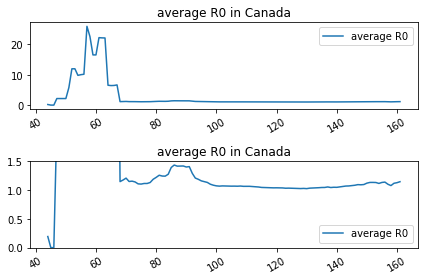

In [ ]:
plt.subplot(211)
# plt.figure(figsize=(10,7))
plt.plot(df_canada_aveR0.loc[0].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0"])
plt.title("average R0 in Canada")

plt.subplot(212)
plt.plot(df_canada_aveR0.loc[0].tolist())
plt.xticks(rotation=30)
plt.ylim(0,1.5)
plt.legend('best', labels=["average R0"])
plt.title("average R0 in Canada")
plt.tight_layout()
plt.show()

### LSTM R0

In [ ]:
# model_LSTM_w3 = tf.keras.models.load_model('HubeiR0_LSTM_w3.h5')

In [ ]:
# w=3
# x_test, y_test = get_traintestdata(df_canada_aveR0, w=w, r=1, lockdown_date=lockdown_date)

In [ ]:
# x_test = np.array(x_test)
# x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], r))
# y_pred = model_LSTM_w3.predict(x_test, verbose=0)

In [ ]:
# lstm_residuals = y_pred - y_test
# lstm_rmse = np.sqrt(np.sum(np.power(lstm_residuals,2)) / len(lstm_residuals))
# print('RMSE = %.2f' % lstm_rmse)

RMSE = 4.16


In [ ]:
# df_LSTM_w3 = df_canada_aveR0.iloc[:,lockdown_date:]
# df_LSTM_w3 = df_LSTM_w3.append(pd.Series(), ignore_index=True)
# df_LSTM_w3.iloc[1,w:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


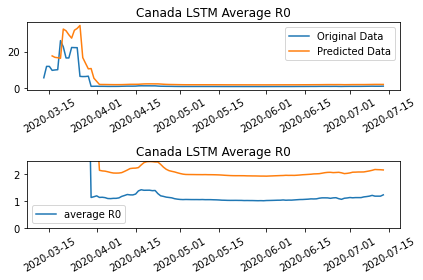

In [ ]:
# # w = 3
# plt.subplot(2,1,1)
# plt.plot(df_LSTM_w3.iloc[0],label="Original Data")
# plt.plot(df_LSTM_w3.iloc[1],label="Predicted Data")
# plt.legend(loc='best')
# plt.ylabel='R0'
# plt.xlabel='Date'
# plt.xticks(rotation=30)
# plt.title('Canada LSTM Average R0')

# plt.subplot(2,1,2)
# plt.plot(df_LSTM_w3.iloc[0],label="Original Data")
# plt.plot(df_LSTM_w3.iloc[1],label="Predicted Data")
# plt.xticks(rotation=30)
# plt.ylim(0,2.5)
# plt.legend('best', labels=["average R0"])
# plt.title("Canada LSTM Average R0")
# plt.tight_layout()
# plt.show()

In [ ]:
model_LSTM_w1 = tf.keras.models.load_model('HubeiR0_LSTM_w1.h5')

In [ ]:
w=1
x_test, y_test = get_traintestdata(df_canada_aveR0, w=w, r=1, lockdown_date=lockdown_date)

In [ ]:
x_test = np.array(x_test)
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], r))
y_pred = model_LSTM_w1.predict(x_test, verbose=0)

lstm_residuals = y_pred - y_test
lstm_rmse = np.sqrt(np.sum(np.power(lstm_residuals,2)) / len(lstm_residuals))
print('RMSE = %.2f' % lstm_rmse)

RMSE = 2.40


In [ ]:
df_LSTM_w1 = df_canada_aveR0.iloc[:,lockdown_date+w-1:]
df_LSTM_w1 = df_LSTM_w1.append(pd.Series(), ignore_index=True)
df_LSTM_w1.iloc[1,w:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


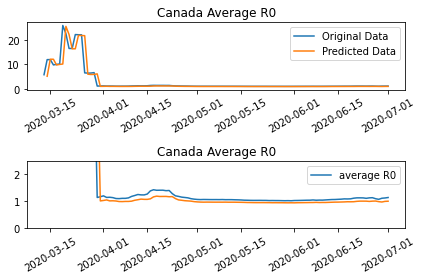

In [ ]:
# w = 1
plt.subplot(2,1,1)
plt.plot(df_LSTM_w1.iloc[0],label="Original Data")
plt.plot(df_LSTM_w1.iloc[1],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel='R0'
plt.xlabel='Date'
plt.xticks(rotation=30)
plt.title('Canada Average R0')

plt.subplot(2,1,2)
plt.plot(df_LSTM_w1.iloc[0],label="Original Data")
plt.plot(df_LSTM_w1.iloc[1],label="Predicted Data")
plt.xticks(rotation=30)
plt.ylim(0,2.5)
plt.legend('best', labels=["average R0"])
plt.title("Canada Average R0")
plt.tight_layout()
plt.show()

In [ ]:
model_NN_w1 = tf.keras.models.load_model('HubeiR0_NN_w1.h5')

In [ ]:
w=1
x_test, y_test = get_traintestdata(df_canada_aveR0, w=w, r=1, lockdown_date=lockdown_date)

In [ ]:
x_test = np.array(x_test)
y_pred = model_NN_w1.predict(x_test, verbose=0)

nn_residuals = y_pred - y_test
nn_rmse = np.sqrt(np.sum(np.power(nn_residuals,2)) / len(nn_residuals))
print('RMSE = %.2f' % nn_rmse)

RMSE = 2.26


In [ ]:
df_NN_w1 = df_canada_aveR0.iloc[:,lockdown_date+w-1:]
df_NN_w1 = df_NN_w1.append(pd.Series(), ignore_index=True)
df_NN_w1.iloc[1,w:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


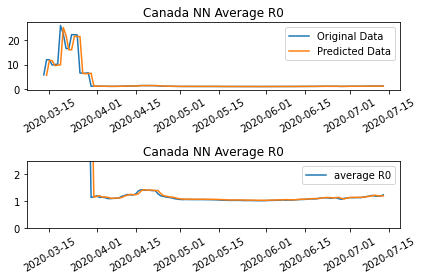

In [ ]:
# w = 1
plt.subplot(2,1,1)
plt.plot(df_NN_w1.iloc[0],label="Original Data")
plt.plot(df_NN_w1.iloc[1],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel='R0'
plt.xlabel='Date'
plt.xticks(rotation=30)
plt.title('Canada NN Average R0')

plt.subplot(2,1,2)
plt.plot(df_NN_w1.iloc[0],label="Original Data")
plt.plot(df_NN_w1.iloc[1],label="Predicted Data")
plt.xticks(rotation=30)
plt.ylim(0,2.5)
plt.legend('best', labels=["average R0"])
plt.title("Canada NN Average R0")
plt.tight_layout()
plt.show()

In [ ]:
model_NN_w5 = tf.keras.models.load_model('HubeiR0_NN_w5.h5')

In [ ]:
w=5
x_test, y_test = get_traintestdata(df_canada_aveR0, w=w, r=1, lockdown_date=lockdown_date)

In [ ]:
x_test = np.array(x_test)
y_pred = model_NN_w5.predict(x_test, verbose=0)

nn_residuals = y_pred - y_test
nn_rmse = np.sqrt(np.sum(np.power(nn_residuals,2)) / len(nn_residuals))
print('RMSE = %.2f' % nn_rmse)

RMSE = 2.65


In [ ]:
df_NN_w5 = df_canada_aveR0.iloc[:,lockdown_date+w-1:]
df_NN_w5 = df_NN_w5.append(pd.Series(), ignore_index=True)
df_NN_w5.iloc[1, 1:] = y_pred.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


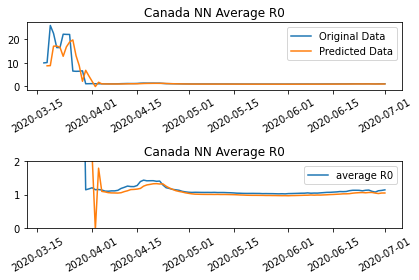

In [ ]:
# w = 5
plt.subplot(2,1,1)
plt.plot(df_NN_w5.iloc[0],label="Original Data")
plt.plot(df_NN_w5.iloc[1],label="Predicted Data")
plt.legend(loc='best')
plt.ylabel='R0'
plt.xlabel='Date'
plt.xticks(rotation=30)
plt.title('Canada NN Average R0')

plt.subplot(2,1,2)
plt.plot(df_NN_w5.iloc[0],label="Original Data")
plt.plot(df_NN_w5.iloc[1],label="Predicted Data")
plt.xticks(rotation=30)
plt.ylim(0,2)
plt.legend('best', labels=["average R0"])
plt.title("Canada NN Average R0")
plt.tight_layout()
plt.show()

### Forecasting


In [ ]:
forecast_days=30
w=5
df_canadaR0_forecast_w5 = R0_forecast(df_NN_w5, model_NN_w5, forecast_days=30, w=w, r=1, LSTM=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


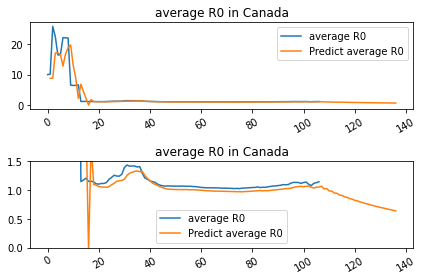

In [ ]:
plt.subplot(2,1,1)
plt.plot(df_canadaR0_forecast_w5.iloc[0, :-forecast_days].tolist())
plt.plot(df_canadaR0_forecast_w5.loc[1].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("average R0 in Canada")

plt.subplot(2,1,2)
plt.plot(df_canadaR0_forecast_w5.iloc[0,:-forecast_days].tolist())
plt.plot(df_canadaR0_forecast_w5.loc[1].tolist())
plt.xticks(rotation=30)
plt.ylim(0,1.5)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("average R0 in Canada")
plt.tight_layout()
plt.show()

In [ ]:
forecast_days=30
w=1
df_canadaR0_forecast_w1 = R0_forecast(df_LSTM_w1, model_LSTM_w1, forecast_days=30, w=w, r=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  del sys.path[0]


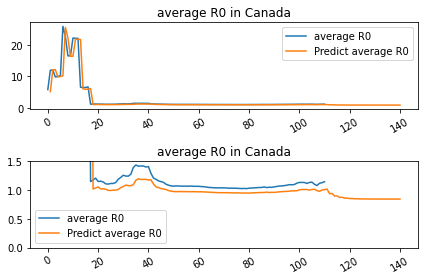

In [ ]:
plt.subplot(2,1,1)
plt.plot(df_canadaR0_forecast_w1.iloc[0, :-forecast_days].tolist())
plt.plot(df_canadaR0_forecast_w1.loc[1].tolist())
plt.xticks(rotation=30)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("average R0 in Canada")

plt.subplot(2,1,2)
plt.plot(df_canadaR0_forecast_w1.iloc[0,:-forecast_days].tolist())
plt.plot(df_canadaR0_forecast_w1.loc[1].tolist())
plt.xticks(rotation=30)
plt.ylim(0,1.5)
plt.legend('best', labels=["average R0", "Predict average R0"])
plt.title("average R0 in Canada")
plt.tight_layout()
plt.show()

## DTW

In [ ]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

In [ ]:
dataframe=df_conf.copy()
df=dataframe
sum_region = df.groupby(['Country/Region']).sum()
sum_region=sum_region.sort_values(sum_region.columns[-1],ascending=False)
sum_region.head(10)

,Lat,Long,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,...,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,37.0902,-95.7129,1,1,2,2,5,5,5,5,...,2222579,2255297,2281655,2312302,2347491,2382327,2422299,2467554,2510151,2548996
Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,0,...,1032913,1067579,1083341,1106470,1145906,1188631,1228114,1274974,1313667,1344143
Russia,60.0000,90.0000,0,0,0,0,0,0,0,0,...,568292,576162,583879,591465,598878,606043,613148,619936,626779,633563
India,21.0000,78.0000,0,0,0,0,0,0,0,0,...,395048,410451,425282,440215,456183,473105,490401,508953,528859,548318
United Kingdom,270.0299,-482.9247,0,0,0,0,0,0,0,0,...,303285,304580,305803,306761,307682,308337,309455,310836,311727,312640
Peru,-9.1900,-75.0152,0,0,0,0,0,0,0,0,...,247925,251338,254936,257447,260810,264689,268602,272364,275989,279419
Chile,-35.6751,-71.5430,0,0,0,0,0,0,0,0,...,231393,236748,242355,246963,250767,254416,259064,263360,267766,271982
Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,...,245575,245938,246272,246504,246752,247086,247486,247905,248469,248770
Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,...,238011,238275,238499,238720,238833,239410,239706,239961,240136,240310


In [ ]:
top10_country=sum_region.head(10).index
top10_country

Index(['US', 'Brazil', 'Russia', 'India', 'United Kingdom', 'Peru', 'Chile',
       'Spain', 'Italy', 'Iran'],
      dtype='object', name='Country/Region')

In [ ]:
lockdown_date=1
df = sum_region.copy()
df_china = df[df.index=="China"]
df_china = df_china.iloc[:,2+lockdown_date:]
df_china

,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,...,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
China,643,920,1406,2075,2877,5509,6087,8141,9802,11891,...,84494,84553,84572,84624,84653,84673,84701,84725,84743,84757


In [ ]:
def values_since_lockdown(dataframe, country, lockdown_date=0):
    df = dataframe.copy()
    new_df = df[df.index==country]
    new_df = new_df.iloc[:,2+lockdown_date:]
    return new_df

In [ ]:
def dtw(country1, country2):
    x=country1.iloc[0]
    x=np.array(x)
    y=country2.iloc[0]
    y=np.array(y)
    x_scale=(x-np.amin(x))/(np.amax(x)-np.amin(x))
    y_scale=(y-np.amin(y))/(np.amax(y)-np.amin(y))
    distance, path = fastdtw(x_scale, y_scale, dist=euclidean)
    return distance, path

In [ ]:
Distance=[]
for country in top10_country:
#     df_country = prefix+country
    df_country = values_since_lockdown(sum_region, country, lockdown_date=0)
    distance, _ = dtw(df_china, df_country)

    Distance.append(distance)

In [ ]:
print("Dynamic Time Warping distance between China and the following countries:")
for i in range(len(top10_country)):
    print("{}: {}".format(top10_country[i], Distance[i]))

Dynamic Time Warping distance between China and the following countries:
US: 2.2258626019353445
Brazil: 2.4267951125153706
Russia: 1.4454425221463838
India: 2.801574124838921
United Kingdom: 1.2119551069125865
Peru: 1.5061884891300568
Chile: 1.5977618470398718
Spain: 0.9293719995976996
Italy: 1.0307600514975106
Iran: 1.94707393097327


Canada

In [ ]:
lockdown_date=51
dtw_canada = values_since_lockdown(sum_region, "Canada", lockdown_date=lockdown_date)
dtw_canada

,2020-03-13 00:00:00,2020-03-14 00:00:00,2020-03-15 00:00:00,2020-03-16 00:00:00,2020-03-17 00:00:00,2020-03-18 00:00:00,2020-03-19 00:00:00,2020-03-20 00:00:00,2020-03-21 00:00:00,2020-03-22 00:00:00,...,2020-06-19 00:00:00,2020-06-20 00:00:00,2020-06-21 00:00:00,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Canada,193,198,252,415,478,657,800,943,1277,1469,...,102314,102762,103078,103418,103767,104087,104463,104629,104878,105193


In [ ]:
dist,_ = dtw(df_china, dtw_canada)
print("Dynamic Time Warping distance between China and Canada is:{}".format(dist))

Dynamic Time Warping distance between China and Canada is:1.2792666089219051


In [ ]:
df_hubei_aveR0

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-05-23,2020-05-24,2020-05-25,2020-05-26,2020-05-27,2020-05-28,2020-05-29,2020-05-30,2020-05-31,2020-06-01,2020-06-02,2020-06-03,2020-06-04,2020-06-05,2020-06-06,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16,2020-06-17,2020-06-18,2020-06-19,2020-06-20,2020-06-21,2020-06-22,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,2020-07-01
0,9.212515,13.544321,13.471056,14.368105,14.740208,15.043069,14.843987,17.012653,14.125969,13.860258,12.183254,10.956206,9.54033,7.970804,5.802139,6.227796,5.790262,5.325837,4.795809,4.442858,4.166967,4.204717,2.514164,2.281598,2.075019,1.831735,1.657195,1.517584,1.507692,1.494194,1.171652,1.139022,1.170485,1.163312,1.139373,1.118397,1.103782,1.10121,1.085418,1.057278,...,0.428571,0.428571,0.428571,0.285714,0.285714,0.428571,0.285714,0.285714,0.142857,0.142857,0.142857,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
italy = df_italy_aveR0.fillna(0).iloc[:, 47:]

In [ ]:
canada = df_canada_aveR0.fillna(0).iloc[:, 51:]

In [ ]:
dist,_ = dtw(df_hubei_aveR0, canada)
print("Dynamic Time Warping distance between China and Canada is:{}".format(dist))

Dynamic Time Warping distance between China and Canada is:7.523579323202372


In [ ]:
dist,_ = dtw(df_hubei_aveR0, italy)
print("Dynamic Time Warping distance between China and Italy is:{}".format(dist))

Dynamic Time Warping distance between China and Italy is:2.9749685201024265
